## PREPARAR O AMBIENTE (e fazer alguns testes)

In [ ]:
# Importar biblioteca pandas
import pandas as pd

# Ler dados do Github
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)

# Mostrar o cabeçalho dos dados:
print(f"Tamanho da matriz de dados: {dados.shape} linhas e colunas")
dados.head()

In [ ]:
# Lista com o nome das colunas do dataframe:
dados.columns.values

### Todos os estados do Brasil estão presentes na lista?


In [ ]:
# Use a funcao unique() na série SG_UG_RESIDENCIA para descobrir quais valores aparecem pelo menos uma vez nessa série:
dados["SG_UF_RESIDENCIA"].unique()
quantidade = len(dados["SG_UF_RESIDENCIA"].unique())
print(f"Aparecem {quantidade} estados (distritos) na lista")

In [ ]:
# Mostrar quantidade de inscristos por idade e ordenar:
dados["NU_IDADE"].value_counts().sort_index()

### Desafio 1: Qual a proporção (%) dos inscritos por idade?

In [ ]:
# Basta normalizar os dados, ou seja, dividir a quantidade de inscritos com determinada idade pelo total de inscritos:
dados["NU_IDADE"].value_counts().sort_index()/len(dados)

###Desafio 2: Descobrir de quais estados são os inscritos com 13 anos

In [ ]:
print("Estados onde nasceram os 4 alunos de 13 anos:")
dados.query("NU_IDADE==13")["SG_UF_NASCIMENTO"]


# HISTOGRAMAS (e seus intervalos de classes)

In [ ]:
# Ao criar um histograma, seja do que for, é comum se fazer a pergunta: quantas classes (bins) eu utilizo? 
# Uma sugestão é usar 1+3*log(n), onde n=tamanho_dos_dados

# para calcular o log vamos importar a biblioteca numpy:
import numpy as np
classes = 1+3*np.log10(len(dados))
print(f"Quantidade de classes do histograma {int(round(classes))}")

# Vamos desenhar o histograma e ao mesmo tempo setar o tamanho da figura:
dados["NU_IDADE"].hist(bins=int(round(classes)), figsize=(8,5))

# Perceba que o argunento bins, antes de receber 'classes', que é um número decimal calculado com o log, é 
# arredondado e depois convertido para inteiro, já que a quantidade de bins deve ser um número inteiro.

### Desafio 3 aula 1: Colocar um título no histograma acima:


In [ ]:
# Usaremos a função pyplot da matplotlib: 
import matplotlib.pyplot as plt
plt.title('Histograma de idade - Inscritos ENEM')
dados["NU_IDADE"].hist(bins=30, figsize=(8,5))
plt.show()

In [ ]:
# Pesquisa os treineiros no dataframe (faz um query) 
# ao mesmo tempo que conta quantos tem de cada idade e ordena pela quantidade: 
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index

###Desafio 4: Plotar dois histogramas de idades, dos treineros e não treineiros


In [ ]:
f1 = plt.figure(1)
plt.title('Histograma de idade - Inscritos ENEM (treineiro)')
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=20)
f1.show
f2 = plt.figure(2)
plt.title('Histograma de idade - Inscritos ENEM (nao treneiro)')
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins=20)
f2.show

# Um pouco de estatística descritiva (média, desvio padrão, quartis, etc.) de todas as notas:


In [ ]:
# perceba que uma lista de nomes pode ser usada com a função describe
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].describe()

###Inferências

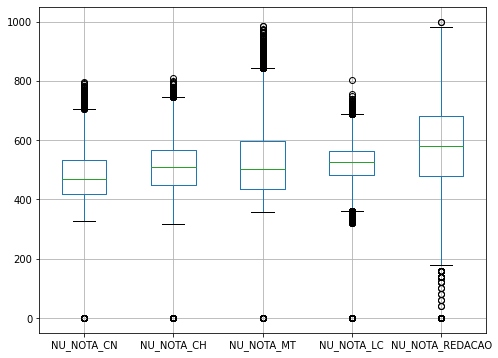

In [12]:
# plortar boxplot com grade:
dados[provas].boxplot(grid=True, figsize =(8,6))

### Desafio 5: plotar as distribuições das provas em inglês e espanhol


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

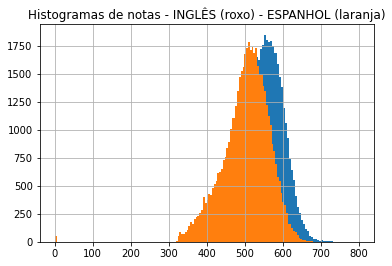

In [13]:
# Usaremos bastante a função pyplot (abreviada como plt) para criar títulos de figura
f1 = plt.figure(1)
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].hist(bins=151,stacked=True, label="Bosta", histtype="barstacked") 
# Dividi o histograma em 151 intervalos para o comportamento da distribuição ficar evidente
plt.title('Histogramas de notas - INGLÊS (roxo) - ESPANHOL (laranja)')
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].hist(bins=151,stacked=True, histtype="barstacked")
f1.show

In [14]:
print(dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].mean())
print(dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].mean())

537.6797324911731
503.64696548108225


### Inferências sobre o desafio 5:

Aparentemente a quantidade de pessoas fazendo os dois tipos de provas é similar, pois a altura dos histogramas é similar, todavia, o histograma de quem escolheu inglês está levemente deslocado para a direita, o que significa que quem escolheu a lingua inglessa tirau notas maiores, em média, na prova de linguagens e códigos.

###Histograma de todas as 5 notas do ENEM:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fe958f438>,
      dtype=object)

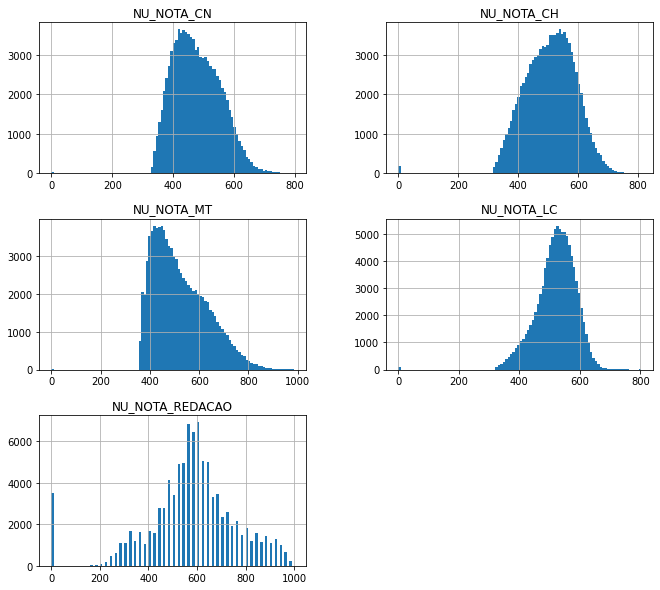

In [15]:
# Lembrar que [provas] é a lista de nomes das colunas do dataframe que armazenam os resultados das provas
plt.title
dados[provas].hist(bins=100, figsize=(11,10))

##Curiosidade: só uma pessoa escolheu cadeira para canhoto, um homem de 33 anos de Goiânia

In [16]:
dados.query("IN_CADEIRA_CANHOTO == 1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
18603,190001742822,2019,5208707,Goiânia,52,GO,33,M,2,2,1,5208707.0,Goiânia,52.0,GO,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,D,D,2,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,B,C,A,B,B


# COMEÇO DA AULA 2
### Gráficos de barras para observar a distribuição de por estado

Quantidade de alunos menores que 14 anos: 145


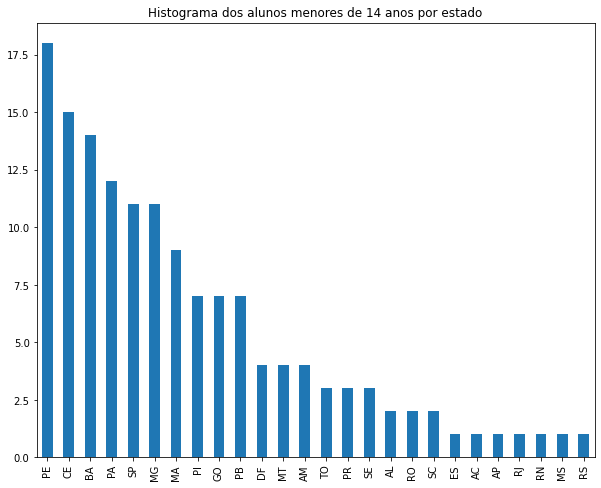

In [17]:
inscritos_menor_idade = dados.query("NU_IDADE <= 14")
inscritos_menor_idade["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))
plt.title('Histograma dos alunos menores de 14 anos por estado')
print(f"Quantidade de alunos menores que 14 anos: {len(inscritos_menor_idade)}")

#### Desafio do Gui Bonzinho (aula 2): Plotar o mesmo gráfico de barras acima para alunos menores de idade:


Quantidade de inscritos menores que 18 anos: 52692


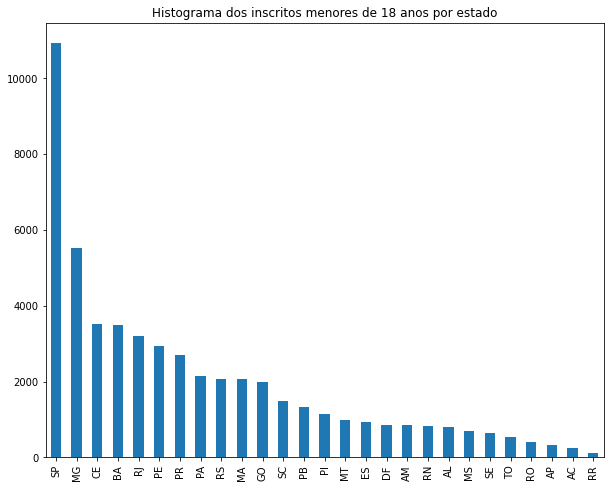

In [18]:
inscritos_menor_idade = dados.query("NU_IDADE <= 18")
inscritos_menor_idade["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))
plt.title('Histograma dos inscritos menores de 18 anos por estado')

# Mostra a quantidade absoluta de inscritos menores ou iguais a 18 anos:
print(f"Quantidade de inscritos menores que 18 anos: {len(inscritos_menor_idade)}")

### Inferências

Quanto menor a amostra, menor a confiança que devemos depositar nos padrões que ela apresenta. Então é importante lembrar que o histograma dos inscritos até 14 anos é pouco confiável, pois são apenas 145 pessoas. Já no segundo plot de barras (desafio 2). Vemos que conforme a amostra aumenta de 145 (inscritos abaixo de 14 anos) para 52.692 mil (inscritos abaixo de 18 anos), o padrão muda completamente. A ordem dos estados se alterou de forma que o estado mais populoso, São Paulo, voutou a ter a maior quantidade de inscritos, já o Rio de Janeiro, que estava entre as 5 últimas posições, pulou para dentre as cinco primeiras.

# UTILIZANDO A BIBLIOTECA SEABORN (para boxplots)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

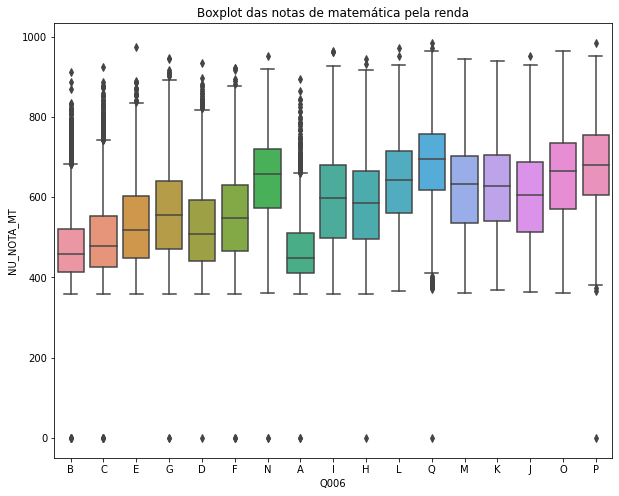

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = dados)
plt.title('Boxplot das notas de matemática pela renda')

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

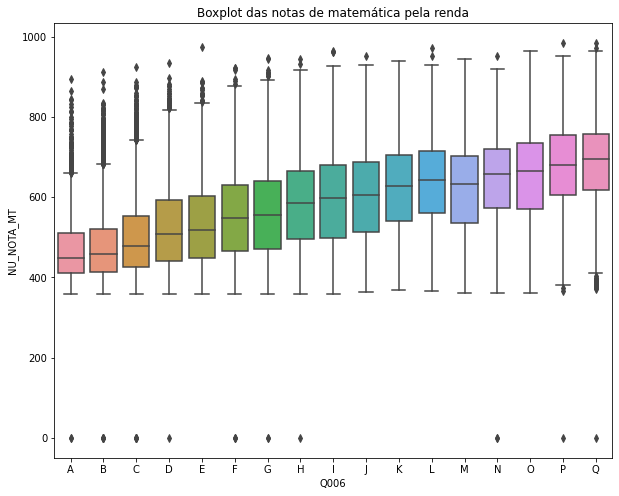

In [20]:
# Para ordenar os boxplot acima, ordene o vetor das siglas de renda "Q006"
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
# Plotando o boxplot novamente:
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = dados, order=renda_ordenada)
plt.title('Boxplot das notas de matemática pela renda')

# Boxplot e histograma do somatório das notas em função da renda
### Desafio 3 Aula 2 - Fazer uma função para automatizar o boxplot:

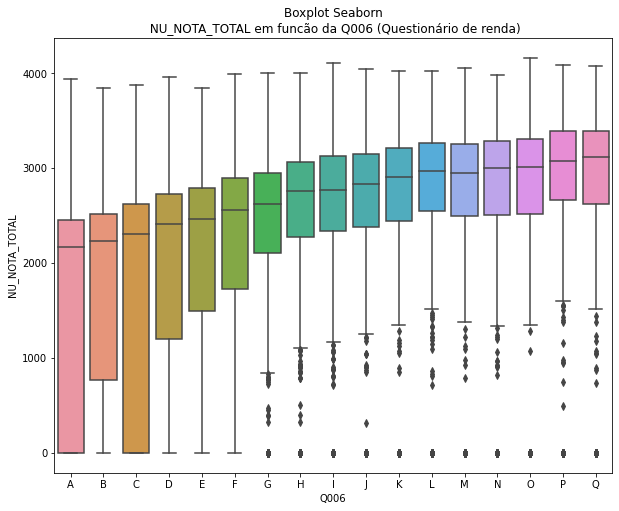

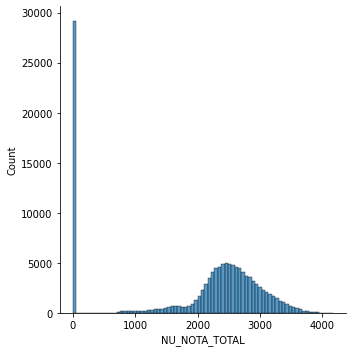

In [21]:
# Criar uma coluna chamada NU_NOTA_TOTAL no dataframe dados que vai quardar a soma das provas:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

# Esta funcão recebe 3 argumentos: dois nomes de séries do dataframe (colunas), 
# e o próprio dataframe. 
# Saída: desenhar o boxplot das duas colunas:
def desenhar_boxplot(eixo_x,eixo_y, dados):
  plt.figure(figsize=(10,8))
  sns.boxplot(x=eixo_x, y=eixo_y, data = dados, order=renda_ordenada)
  plt.title(f'Boxplot Seaborn\n {eixo_y} em funcão da {eixo_x} (Questionário de renda)')

# Teste da função criada acima:
desenhar_boxplot("Q006","NU_NOTA_TOTAL", dados)
# plot do histograma usando a biblioteca Seaborn
sns.displot(dados, x="NU_NOTA_TOTAL")

###Inferências:

As notas de matemática aumentam, na média e na mediana, conforme a renda aumenta. Os outliers somem no limite superior porque o range de notas "bate no teto", conforme o crecimento segue. No somatório o comportamento interessante é que conforme a rende cresce, a dispersão em torno do centro se torna menor. 

Perceba que devido a grande quantidade de notas 0 nas faixas de renda A e C, o 
boxplot delas está alongado até o limite inferior, o "chão" do gráfico.

# Boxplot e Histograma do somatório das notas sem as provas zeradas

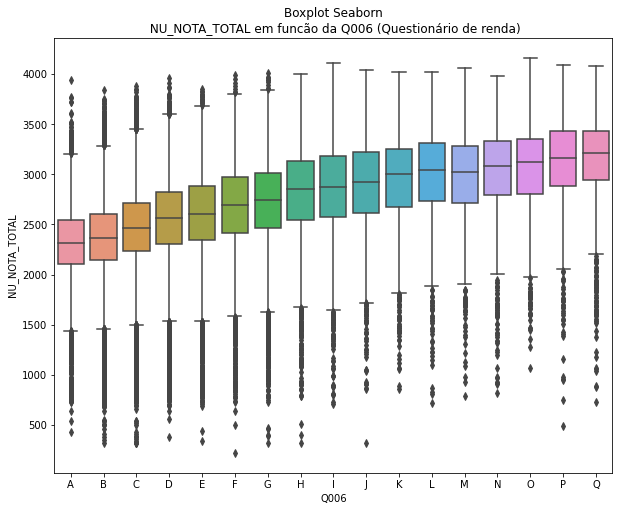

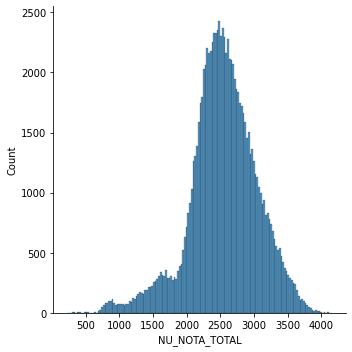

In [22]:
# Burcar apenas as notas que não tem somatório igual a 0:
notas_sem_zero = dados.query("NU_NOTA_TOTAL != 0")
desenhar_boxplot("Q006","NU_NOTA_TOTAL", notas_sem_zero)

# Plotar o histograma do somatório das notas não zeradas:
sns.displot(notas_sem_zero, x="NU_NOTA_TOTAL")


## Desafio 4 aula 2: Quem é eliminado fica com 0 ou NaN na nota?

In [23]:
# A coluna do dataframe que vai informar se o inscrito foi eliminado é a TP_PRESENCA_XX (=2 significa eliminado)
# Junto com a função query() e a função unique() podemos descobrir quais valores aparecem lá fazendo:
print(dados.query("TP_PRESENCA_CN == 2")["NU_NOTA_CN"].unique()) 
print(dados.query("TP_PRESENCA_CH == 2")["NU_NOTA_CH"].unique())
print(dados.query("TP_PRESENCA_MT == 2")["NU_NOTA_MT"].unique())
print(dados.query("TP_PRESENCA_LC == 2")["NU_NOTA_LC"].unique())

[nan]
[nan]
[nan]
[nan]


## ###Explicando o que acontece acima por extenso:
O query vai pegar das colunas NU_NOTA_XX apenas os valores que tem também na coluna TP_PRESENCA_XX == 2. Como usamos a função unique() ela vai listar quais valores aparecem lá, se apenas valores NaN retornarem é porque ele é o único valor presente nas notas dos eliminados, isto é, queles que tem TP_PRESENCA_XX == 2 mostrando que quem é eliminado não recebe 0, mas sim 'NaN'. 

##Curiosidade 2: Quem tem aspirador de pó em casa tira notas mais baixas, independente da renda familiar.
Como um cientísta de dados você não deve levar todos os gráficos ao pé da letra (como o que fiz abaixo), isto pode ser apenas um caso de sorte devido ao enviesamento dos dados. Sabemos que estamos trabalhando com uma amostra e não conhecermos sua significância. Além disso as pessoas podem simplesmente não ter dado atenção na resposta da pergunta sobre o aspirador. A combinação destas e outras possibilidades as vezes resulta em padrões que não retratam a realidade

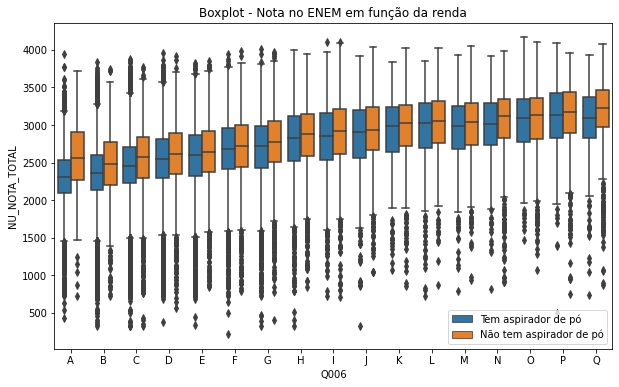

In [24]:
# Gerar a figura:
plt.figure(figsize=(10,6))
plt.title("Boxplot - Nota no ENEM em função da renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=notas_sem_zero, order=renda_ordenada, hue="Q018")

# Adicionar legenda na variável categórica (hue):
L=plt.legend()
L.get_texts()[0].set_text('Tem aspirador de pó')
L.get_texts()[1].set_text('Não tem aspirador de pó')

## Boxplot das notas (segundo a renda) de quem TEM INTERNET e quem NÃO TEM INTERNET


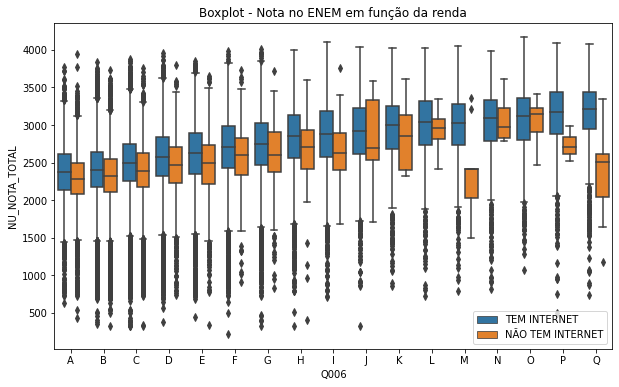

In [25]:
# Gerar a figura
plt.figure(figsize=(10,6))
plt.title("Boxplot - Nota no ENEM em função da renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=notas_sem_zero, order=renda_ordenada, hue="Q025")

# Adicionar legenda na variável categórica (hue):
L=plt.legend()
L.get_texts()[0].set_text('TEM INTERNET')
L.get_texts()[1].set_text('NÃO TEM INTERNET')

## Boxplot das notas (segundo a renda) dos TREINEIROS e NÃO TREINEIROS


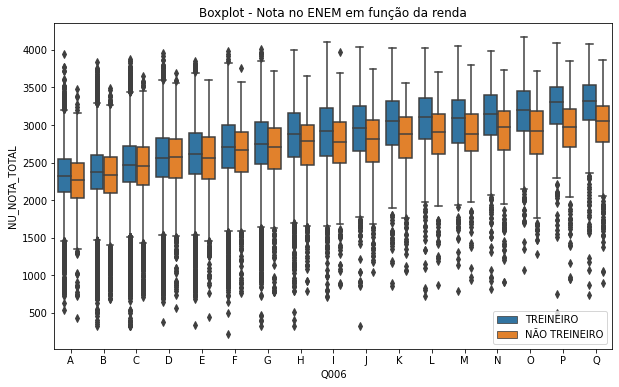

In [26]:
# Gerar a figura:
plt.figure(figsize=(10,6))
plt.title("Boxplot - Nota no ENEM em função da renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=notas_sem_zero, order=renda_ordenada, hue="IN_TREINEIRO")

# Adicionar legenda na variável categórica (hue):
L=plt.legend()
L.get_texts()[0].set_text('TREINEIRO')
L.get_texts()[1].set_text('NÃO TREINEIRO')

### Inferências
Aparentemente os treineiros de renda mais alta tem notas mais divergentes, de forma que os não treineiros tiram notas mais baixas. Já na população com renda mais baixa, as notas de treineiros e não treineiros são similares. 

O que poderi explciar tais padrões? Sugeriu-se que a quantidade de treineiros poderia ser maior entre as classes de renda maior, vamos testar essa hipótese criando um gráfico de barras que mostra a distribuição dos treineiros segundo as faixas de renda.

# Teste da hipótese do Gui

Quantidade de inscritos treineiros: 15401


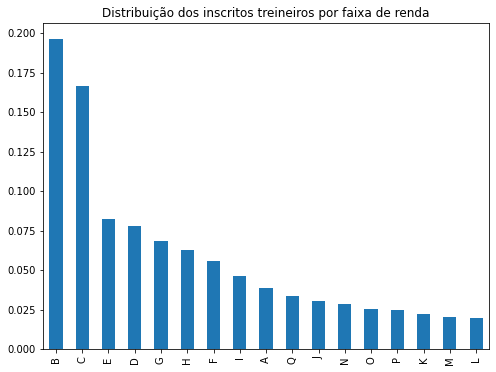

In [27]:
inscritos_treineiros = dados.query("IN_TREINEIRO == 1")
inscritos_treineiros["Q006"].value_counts(normalize=True).plot.bar(figsize=(8,6))
plt.title('Distribuição dos inscritos treineiros por faixa de renda')
print(f"Quantidade de inscritos treineiros: {len(inscritos_treineiros)}")

##Conclusão sobre a hipótese do Gui
A hipótese não é verdadeira, vemos que faixas de menor renda (B,C,E,D) inscrevem mais pessoas como treineiros que as faixas (N,O,P,Q) que são de maior renda.

# COMEÇO DA AULA 3
### Desafio 1 plotar os histogramas de cada nota e dizer se a distribuição é assimetrica a direita ou a esquerda

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


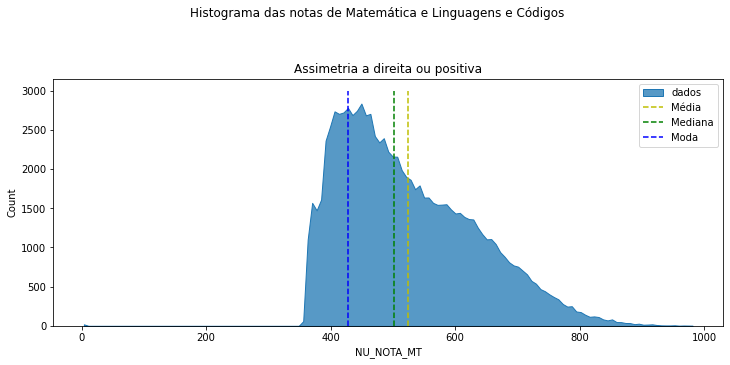

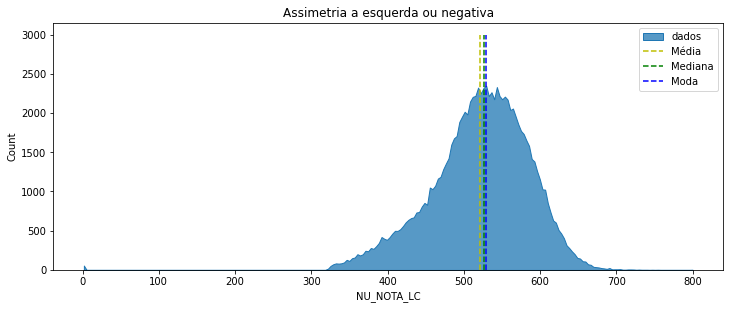

In [28]:
# Plot de uma figura e subdivisão em subplots
plt.figure(figsize = (12,10)) # tamanho
plt.subplot(2,1,1) # subdivisões
plt.suptitle("Histograma das notas de Matemática e Linguagens e Códigos")
sns.histplot(notas_sem_zero, x = "NU_NOTA_MT", element="poly") # plot do histograma pela Seaborn
plt.vlines(x = notas_sem_zero["NU_NOTA_MT"].mean(), ymin=0, ymax=3000, colors="Y", linestyles="dashed") # criar linha vertical na média (Amarela)
plt.vlines(x = notas_sem_zero["NU_NOTA_MT"].quantile(0.5), ymin=0, ymax=3000, colors="G", linestyles="dashed") # criar linha vertical na mediana (Verde)
plt.vlines(x = notas_sem_zero["NU_NOTA_MT"].mode(), ymin=0, ymax=3000, colors="B", linestyles="dashed") # criar linha vertical na moda (Azul)
plt.legend(["dados","Média","Mediana","Moda"]) # legenda das linhas
plt.title("Assimetria a direita ou positiva")  # Título da figura 

plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
sns.histplot(notas_sem_zero, x = "NU_NOTA_LC",element="poly")
plt.vlines(x = notas_sem_zero["NU_NOTA_LC"].mean(), ymin=0, ymax=3000, colors="Y", linestyles="dashed")
plt.vlines(x = notas_sem_zero["NU_NOTA_LC"].quantile(0.5), ymin=0, ymax=3000, colors="G", linestyles="dashed")
plt.vlines(x = notas_sem_zero["NU_NOTA_LC"].mode(), ymin=0, ymax=3000, colors="B", linestyles="dashed")
plt.legend(["dados","Média","Mediana","Moda"])
plt.title("Assimetria a esquerda ou negativa")


plt.show()

##Desafio: Comparar a nota de quem TEM INTERNET e quem NÃO TEM INTERNET 

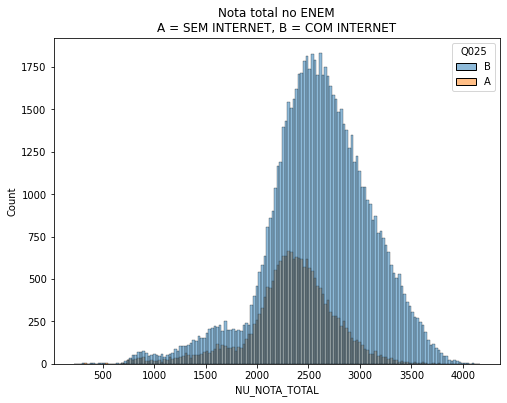

In [29]:
# Faremos um histograma da nota total com ambas as categorias do questionário "Q025"
plt.figure(figsize = (8,6))
plt.title("Nota total no ENEM\nA = SEM INTERNET, B = COM INTERNET")
sns.histplot(notas_sem_zero, x = "NU_NOTA_TOTAL",hue="Q025")

In [30]:
print("Diferença média entre quem TEM INTERNET e de quem NÃO TEM INTERNET:") 
(notas_sem_zero.query("Q025 == 'B'")["NU_NOTA_TOTAL"].mean())-(notas_sem_zero.query("Q025 == 'A'")["NU_NOTA_TOTAL"].mean())

Diferença média entre quem TEM INTERNET e de quem NÃO TEM INTERNET:


271.04513774103

## Outra forma de análise - Histograma acumulado
Vamos passar mais 2 argumentos para a função histplot (cumulative = True e stat = "probability") cumulative muda o histograma para a forma acumulada, "probability" faz com que a área do histograma seja igual a 1, o que normaliza a distribuição para uma Função de Densidade de Probabilidade (FDP).

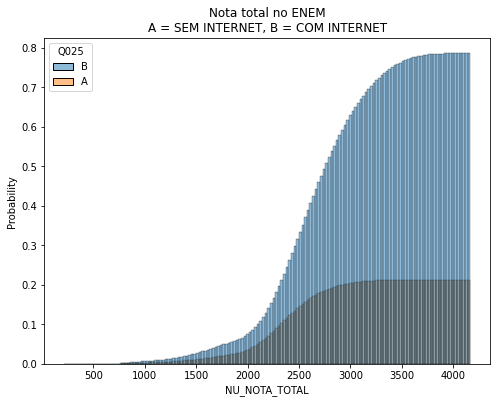

In [31]:
plt.figure(figsize = (8,6))
plt.title("Nota total no ENEM\nA = SEM INTERNET, B = COM INTERNET")
sns.histplot(notas_sem_zero, x = "NU_NOTA_TOTAL", hue = "Q025", cumulative = True, stat = "probability")

## Scatterplot 2D - Gráfico para análises de padrões (é só um plano cartesiano com duas variáveis)

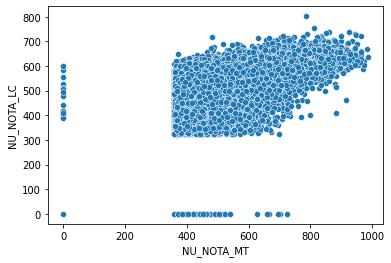

In [32]:
sns.scatterplot(data = notas_sem_zero, x = "NU_NOTA_MT", y = "NU_NOTA_LC")

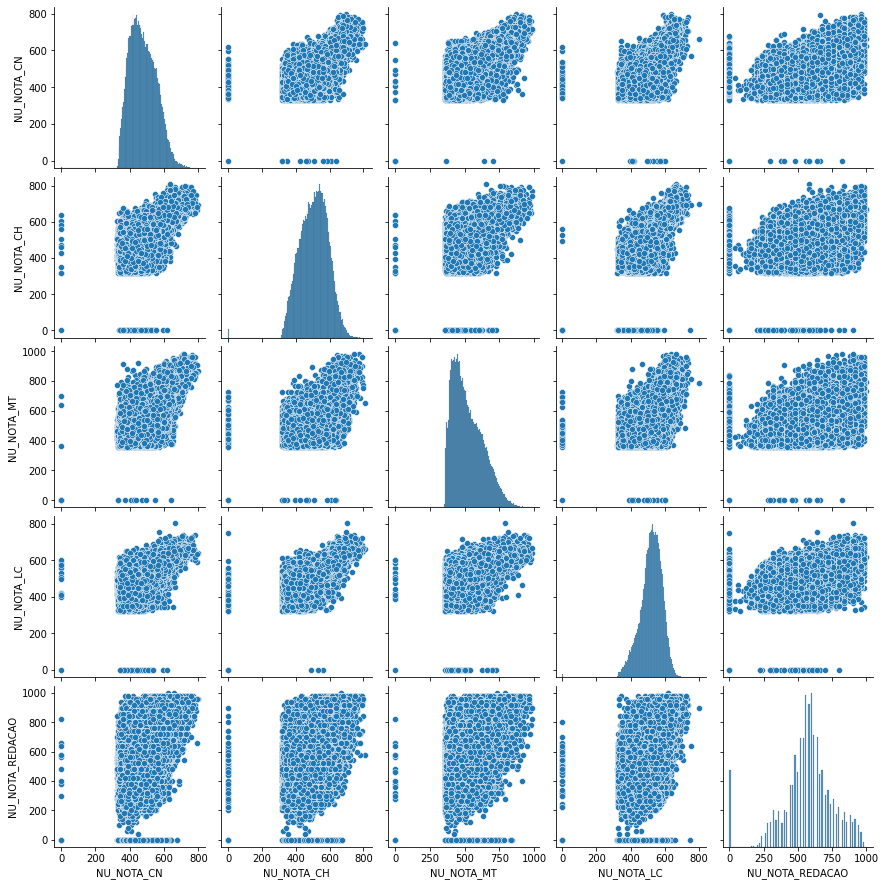

In [33]:
#plotar todos os pares de notas
sns.pairplot(notas_sem_zero[provas])

## Análise de correlação - probabilidades entre as variáveis
A correlação pode ser interpretada como uma medida da probabilidade de uma variável influenciar a outra. Assim, ela varia de -1 a 1, de forma que a medida de correlação 1 quer dizer 100% de influência, sempre uma se movimentar, a outra também vai. A correlação pode ser calculada para qualquer par de variáveis, não importando quais sejam. O importante é lembrar que correlação não implica causalidade, pois embora dois fenômenos possam ser altamente correlacionados, isto não implica que um é a causa do outro. Considera-se alta correlação valores maiores que 75%.

In [ ]:
correlacao = notas_sem_zero[provas].corr()
correlacao

In [ ]:
sns.heatmap(correlacao, cmap = "Blues", center = 0, annot = True)

## Sobre a correlação entre Matemática e Linguagens
Nâo há muito o que se inferir do valor de correlação entre Matemática e Linguagens. 59 % significa apenas que quando a nota de matemática se movimenta, há 59 % de chance da nota de Linguagens também se mover, e viceversa. Sabemos que para se dar bem em matemática é preciso uma boa interpretação do português, mas há um leque de outras coisas no meio que também influenciam nisso. Portanto, qualquer inferência utilizando apenas este número é prematura. Há outra correlação, a de Linguagens com Ciências Humanas, que chega a quase 75 %, um valor relativamente alto, e por isso bem mais interessante de se analisar. 

## Desafio 3 aula 3: Filtrar os dados pelo seu estado (Piauí, no meu caso) e refazer as análises.

In [ ]:
# Pesquisar e salvar apenas quem fez a prova no Piauí:
dados_sem_nota_zero_PI = notas_sem_zero.query("SG_UF_PROVA=='PI'")

# Scaterplots 2D:
sns.pairplot(dados_sem_nota_zero_PI[provas])

In [ ]:
# Matriz de correlação:
correlacao_PI = dados_sem_nota_zero_PI[provas].corr()
sns.heatmap(correlacao_PI, cmap = "Blues", center = 0, annot = True)

## AULA 4 - Treinar um modelo de Machine Learning

In [38]:
# Pre-processar os dados retirando valores NaN:
dados_sem_nota_zero_PI = dados_sem_nota_zero_PI[provas].dropna()

# Escolher as notas de entrada, que vão treinar o modelo:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
notas_entrada = dados_sem_nota_zero_PI[provas_entrada]

# Escolher a nota que se quer estimar, a nota de matemática, que será a saída:
prova_saida = "NU_NOTA_MT"
nota_saida = dados_sem_nota_zero_PI[prova_saida]

## Precisamos separar nossos dados em dois conjuntos: dados para treino e dados para validação
Portanto, vamos usar a função train_test_split da biblioteca SciKitLearn

In [39]:
from sklearn.model_selection import train_test_split

x = notas_entrada
y = nota_saida

semente = 31415 # semente aleatória para reproducibilidade
x_treino, x_teste, y_treino, y_teste  = train_test_split(x, y, test_size = 0.25, random_state = semente)

print(f"Formato dos dados x_treino {x_treino.shape}")
print(f"Formato dos dados y_treino {y_treino.shape}")

print(f"Formato dos dados x_teste {x_teste.shape}")
print(f"Formato dos dados y_teste {y_teste.shape}")


Formato dos dados x_treino (1780, 4)
Formato dos dados y_treino (1780,)
Formato dos dados x_teste (594, 4)
Formato dos dados y_teste (594,)


In [40]:
from sklearn.svm import LinearSVR

# Treinar o modelo com os dados de treino
modelo = LinearSVR(random_state = semente)
modelo.fit(x_treino,y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=31415)

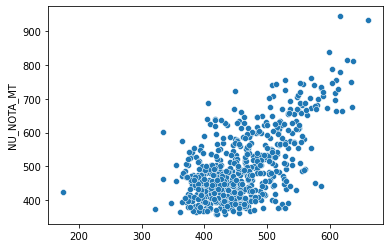

In [41]:
# Fazer predição das notas de matemática usando as outras notas presentes em x_teste
nota_predita = modelo.predict(x_teste)
nota_verdade = y_teste

# plotar a nota verdadeira contra a nota predita
sns.scatterplot(x=nota_predita, y=nota_verdade)

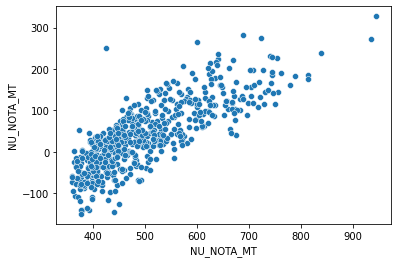

In [42]:
# Plotar diferença entre a nota real e a nota prevista:
sns.scatterplot(x = nota_verdade, y = nota_verdade-nota_predita)

In [43]:
# Calcular o RMSE (quadrado da diferença em relação à média)
RMSE1 = (sum((nota_verdade-nota_predita)**2)/len(nota_predita))**(1/2)
print(f"RMSE calculado na mão: {RMSE1}")

# Avaliar RMSE por meio do SciKitLearn
from sklearn.metrics import mean_squared_error
RMSE2 = mean_squared_error(nota_verdade, nota_predita)
print(f"RMSE calculado com a função do Sci-Kit-Learn: {RMSE2**(1/2)}")

RMSE calculado na mão: 89.27905299659125
RMSE calculado com a função do Sci-Kit-Learn: 89.27905299659125


In [49]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse

# Treinar o modelo DummyRegresso:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)

# Realizar predições 
dummy_predicoes = modelo_dummy.predict(x_teste)

# Avaliar RMSE
RMSE_dummy = mean_squared_error(nota_verdade, dummy_predicoes)
print(RMSE_dummy**(1/2))


102.52072816419518


In [51]:
# Importar outro modelo (RANDOM FOREST)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth = 3)

# Treinar modelo
modelo_DecisionTreeRegressor.fit(x_treino, y_treino)

# Realizar predições
nota_predita = modelo_DecisionTreeRegressor.predict(x_teste)

# Calcular RMSE e MAE (Mean Absolute Error)
print(mse(nota_verdade, nota_predita)**(1/2))
print(mae(nota_verdade, nota_predita))

77.16737858410897
60.176464762211424


In [ ]:
!pip install ipyvolume 
import ipyvolume as ipv

In [56]:
# Transformar dataset de 3 notas em numpy array
provas = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN"]
notas3D = dados_sem_nota_zero_PI[provas]
notas3D = notas3D.to_numpy()

# Desenhar o plot 3D
x = notas3D[:,0] ; y = notas3D[:,1] ; z = notas3D[:,2]
ipv.quickscatter(x, y, z, size=0.5, marker="sphere")

In [58]:
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")